In [ ]:

import os
import glob
import pandas as pd

input_directory = "/content"

# Set the name for the combined output CSV file
output_filename = "/content/combined_output.csv" # Output file will be saved in the Colab environment

# Get a list of all CSV files in the input directory
all_files = glob.glob(os.path.join(input_directory, "*.csv"))

# Create a list to hold the dataframes
df_list = []

# Check if any files were found
if not all_files:
    print(f"No CSV files found in {input_directory}")
else:
    # Read each CSV file and append its data to the list
    for f in all_files:
        try:
            df = pd.read_csv(f, encoding='latin-1')
            df_list.append(df)
        except UnicodeDecodeError:
            print(f"Could not decode {f} with latin-1 encoding. Trying with cp1252.")
            try:
                df = pd.read_csv(f, encoding='cp1252')
                df_list.append(df)
            except Exception as e:
                print(f"Could not decode {f} with cp1252 encoding. Skipping file. Error: {e}")


    # Concatenate all dataframes in the list
    if df_list:
        combined_df = pd.concat(df_list, ignore_index=True)

        # Write the combined dataframe to a new CSV file
        combined_df.to_csv(output_filename, index=False)

        print(f"Combined {len(df_list)} successfully read CSV files into {output_filename}")
    else:
        print("No files were successfully read to be combined.")

Combined 23 successfully read CSV files into /content/combined_output.csv


In [ ]:
import pandas as pd

df=pd.read_csv("/content/combined_output.csv")
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`27,`000,STATE - MAHARASHTRA,`00,`000,`0000,Total,2280899,1728173,552726,...,412992,292200,177937,114263,97675,56171,41504,194525,121766,72759
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"Crop and animal production, hunting and relate...",11447,8460,2987,...,669,2106,1138,968,1710,908,802,396,230,166
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,Growing of non-perennial crops,81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"Growing of vegetables and melons, roots and tu...",21,16,5,...,3,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`33,`633,District - Tiruppur,`99,`000,`0000,Activities of extraterritorial organizations a...,2619,1090,1529,...,885,1920,683,1237,838,316,522,1082,367,715
195141,`33,`633,District - Tiruppur,`99,`991,`0000,Blank,2027,919,1108,...,640,1607,599,1008,676,280,396,931,319,612
195142,`33,`633,District - Tiruppur,`99,`991,`9910,Blank,2027,919,1108,...,640,1607,599,1008,676,280,396,931,319,612
195143,`33,`633,District - Tiruppur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,592,171,421,...,245,313,84,229,162,36,126,151,48,103


In [ ]:
a=df[df['NIC Name']=='Total']
a

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`27,`000,STATE - MAHARASHTRA,`00,`000,`0000,Total,2280899,1728173,552726,...,412992,292200,177937,114263,97675,56171,41504,194525,121766,72759
732,`27,`497,District - Nandurbar,`00,`000,`0000,Total,6770,5102,1668,...,1064,1124,665,459,410,233,177,714,432,282
1083,`27,`498,District - Dhule,`00,`000,`0000,Total,17494,13096,4398,...,2574,2212,1416,796,954,540,414,1258,876,382
1489,`27,`499,District - Jalgaon,`00,`000,`0000,Total,41445,32742,8703,...,5469,7151,4555,2596,2694,1560,1134,4457,2995,1462
1981,`27,`500,District - Buldana,`00,`000,`0000,Total,26127,20011,6116,...,3298,3680,2339,1341,1900,1143,757,1780,1196,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192599,`33,`629,District - Kanniyakumari,`00,`000,`0000,Total,19494,14551,4943,...,3463,4232,2355,1877,1042,426,616,3190,1929,1261
193054,`33,`630,District - Dharmapuri,`00,`000,`0000,Total,34842,26438,8404,...,2236,6200,3692,2508,5192,2970,2222,1008,722,286
193514,`33,`631,District - Krishnagiri,`00,`000,`0000,Total,41446,31036,10410,...,3732,8940,5174,3766,7302,4138,3164,1638,1036,602
194008,`33,`632,District - Coimbatore,`00,`000,`0000,Total,156570,106492,50078,...,39880,20315,10321,9994,5832,2630,3202,14483,7691,6792


In [ ]:
# Total row removed

df_filtered = df[df['NIC Name'] != 'Total']
df_filtered

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"Crop and animal production, hunting and relate...",11447,8460,2987,...,669,2106,1138,968,1710,908,802,396,230,166
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,Growing of non-perennial crops,81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"Growing of vegetables and melons, roots and tu...",21,16,5,...,3,1,1,0,1,1,0,0,0,0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,Growing of sugar cane,0,0,0,...,0,4,2,2,4,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`33,`633,District - Tiruppur,`99,`000,`0000,Activities of extraterritorial organizations a...,2619,1090,1529,...,885,1920,683,1237,838,316,522,1082,367,715
195141,`33,`633,District - Tiruppur,`99,`991,`0000,Blank,2027,919,1108,...,640,1607,599,1008,676,280,396,931,319,612
195142,`33,`633,District - Tiruppur,`99,`991,`9910,Blank,2027,919,1108,...,640,1607,599,1008,676,280,396,931,319,612
195143,`33,`633,District - Tiruppur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,592,171,421,...,245,313,84,229,162,36,126,151,48,103


In [ ]:
df_filtered = df[df['NIC Name'] != 'Total']

In [ ]:
df_filtered.describe()

,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
count,1.946510e+05,1.946510e+05,194651.000000,194651.000000,194651.000000,194651.000000,1.946510e+05,1.946510e+05,194651.000000,194651.000000,194651.000000,194651.000000,194651.000000,194651.000000,194651.000000,194651.000000,194651.000000,194651.000000
mean,1.121943e+03,8.971495e+02,224.793831,496.721466,388.760613,107.960853,6.252218e+02,5.083888e+02,116.832978,273.893738,137.321771,136.571967,188.147752,87.614870,100.532882,85.745986,49.706901,36.039085
std,1.438311e+04,1.248173e+04,3492.220425,6761.493158,5666.473257,2059.114034,8.323876e+03,7.316491e+03,1797.235028,5067.643324,2229.798976,3367.105662,3654.177235,1470.206199,2585.756007,1750.687941,845.380518,1046.213123
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000e+00,6.000000e+00,0.000000,2.000000,1.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.800000e+01,2.300000e+01,3.000000,12.000000,8.000000,0.000000,1.200000e+01,9.000000e+00,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.860000e+02,1.430000e+02,24.000000,72.000000,56.000000,8.000000,8.400000e+01,6.600000e+01,11.000000,27.000000,18.000000,6.000000,14.000000,8.000000,3.000000,9.000000,6.000000,2.000000
max,2.559212e+06,2.416140e+06,452152.000000,934749.000000,886601.000000,299321.000000,1.624463e+06,1.529539e+06,213182.000000,940826.000000,292869.000000,647957.000000,536452.000000,188345.000000,384587.000000,404374.000000,141004.000000,263370.000000


In [ ]:
df_filtered.duplicated().sum()

np.int64(0)

In [ ]:
df_filtered.isnull().sum()

,0
State Code,0
District Code,0
India/States,0
Division,0
Group,0
Class,0
NIC Name,0
Main Workers - Total - Persons,0
Main Workers - Total - Males,0
Main Workers - Total - Females,0


In [ ]:
df_filtered

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"Crop and animal production, hunting and relate...",11447,8460,2987,...,669,2106,1138,968,1710,908,802,396,230,166
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,Growing of non-perennial crops,81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"Growing of vegetables and melons, roots and tu...",21,16,5,...,3,1,1,0,1,1,0,0,0,0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,Growing of sugar cane,0,0,0,...,0,4,2,2,4,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`33,`633,District - Tiruppur,`99,`000,`0000,Activities of extraterritorial organizations a...,2619,1090,1529,...,885,1920,683,1237,838,316,522,1082,367,715
195141,`33,`633,District - Tiruppur,`99,`991,`0000,Blank,2027,919,1108,...,640,1607,599,1008,676,280,396,931,319,612
195142,`33,`633,District - Tiruppur,`99,`991,`9910,Blank,2027,919,1108,...,640,1607,599,1008,676,280,396,931,319,612
195143,`33,`633,District - Tiruppur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,592,171,421,...,245,313,84,229,162,36,126,151,48,103


Processing column: Main Workers - Total -  Persons


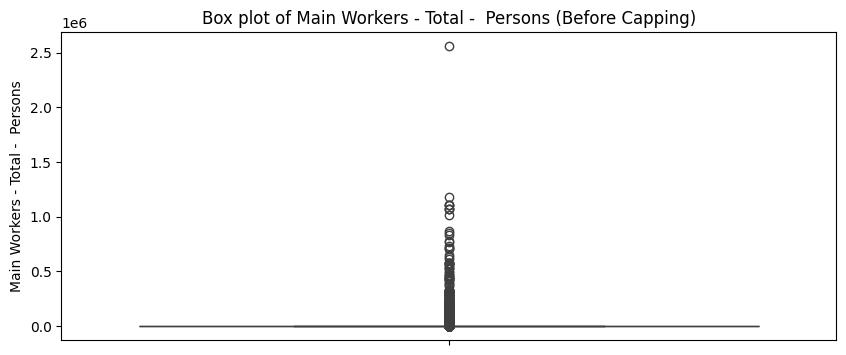

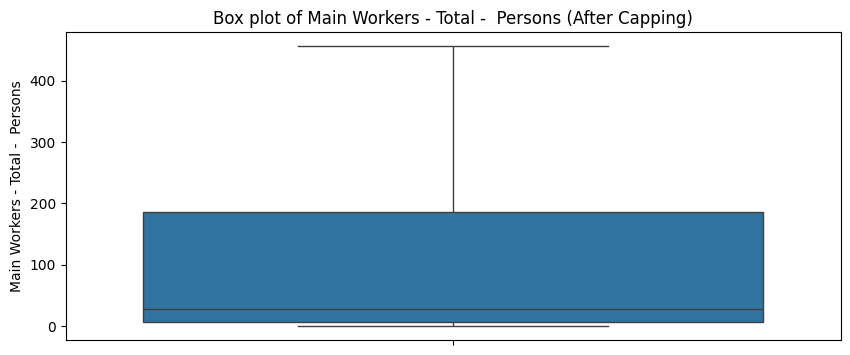

Processing column: Main Workers - Total - Males


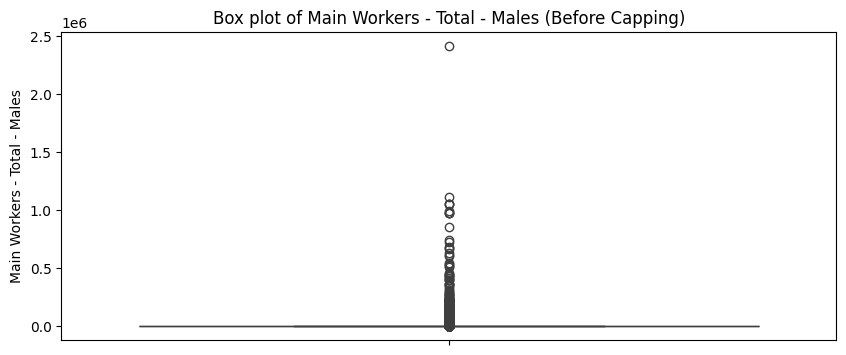

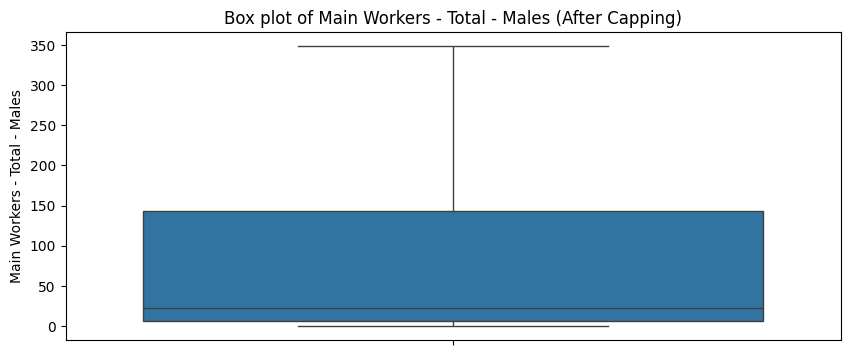

Processing column: Main Workers - Total - Females


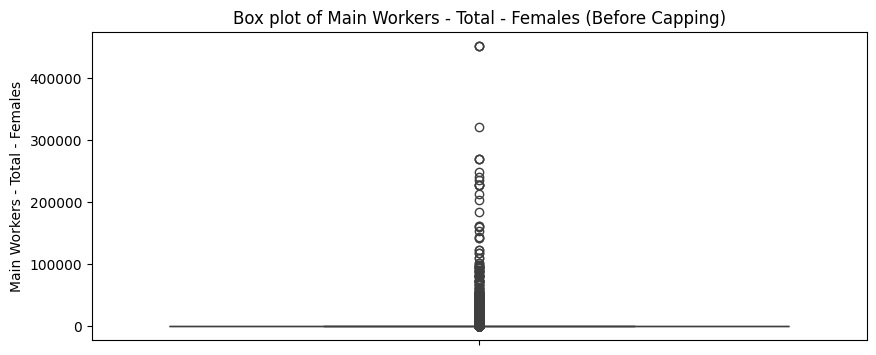

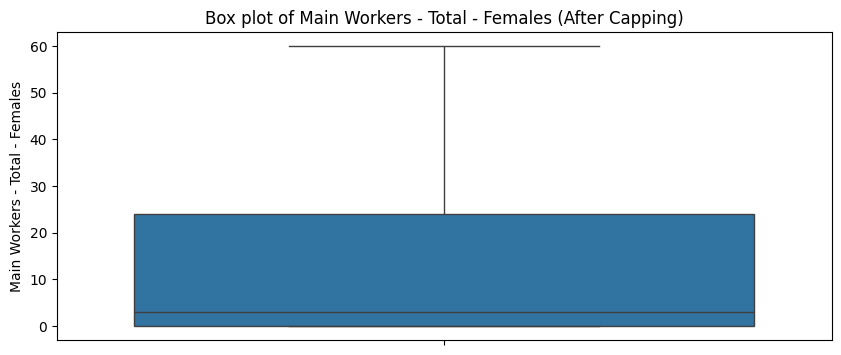

Processing column: Main Workers - Rural -  Persons


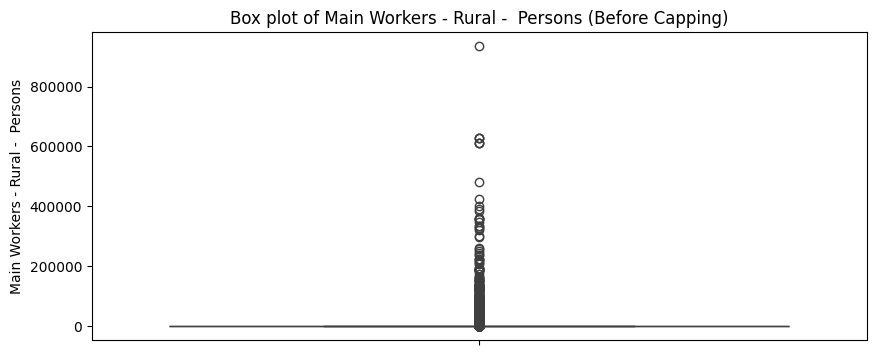

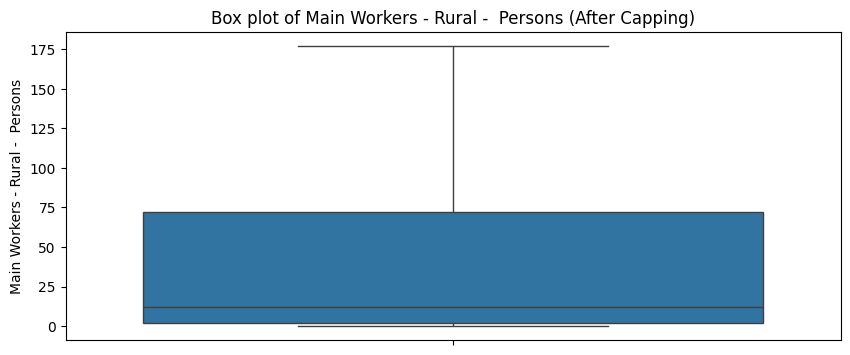

Processing column: Main Workers - Rural - Males


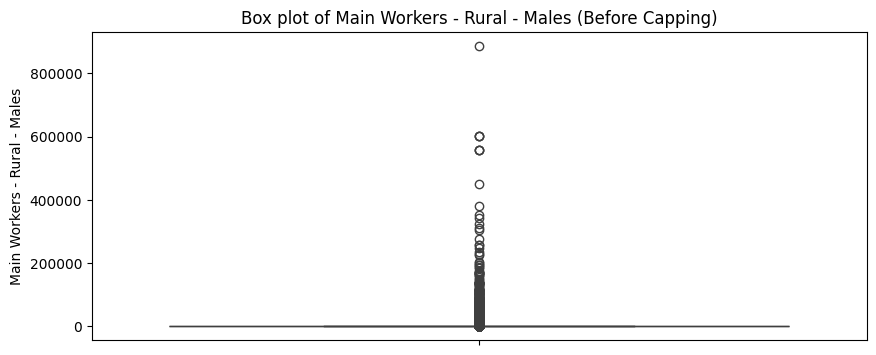

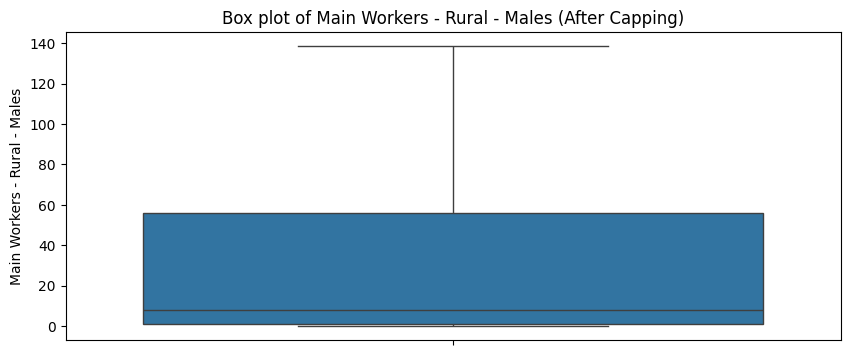

Processing column: Main Workers - Rural - Females


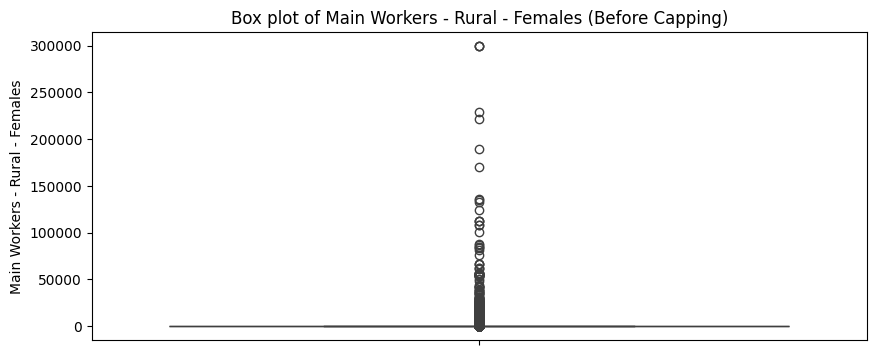

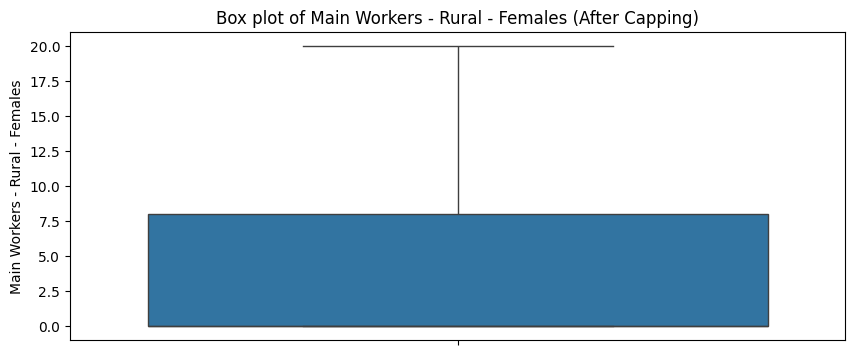

Processing column: Main Workers - Urban -  Persons


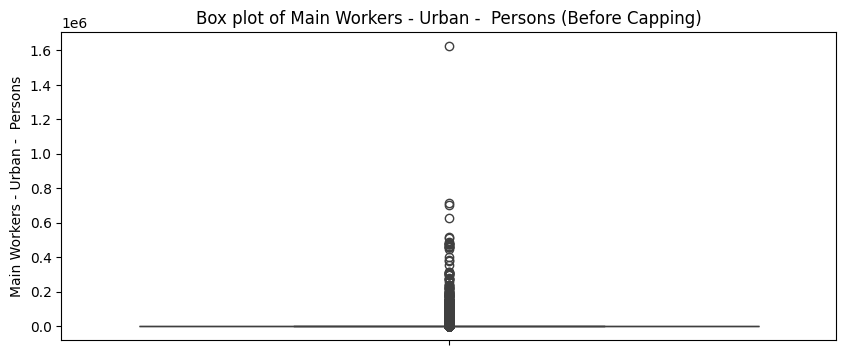

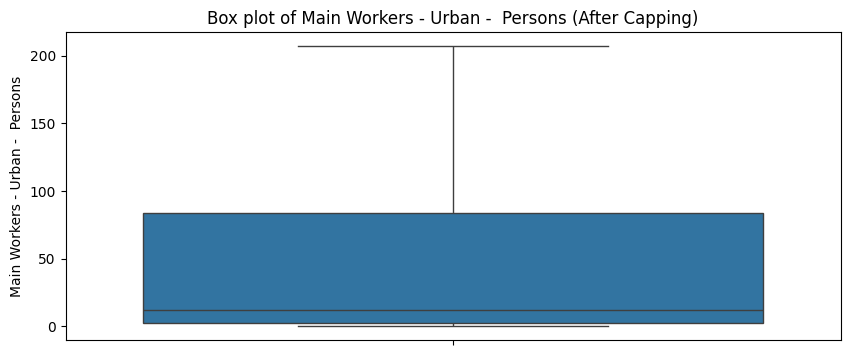

Processing column: Main Workers - Urban - Males


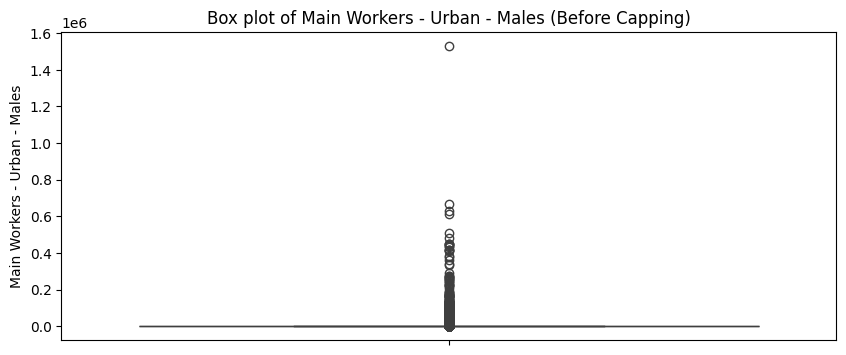

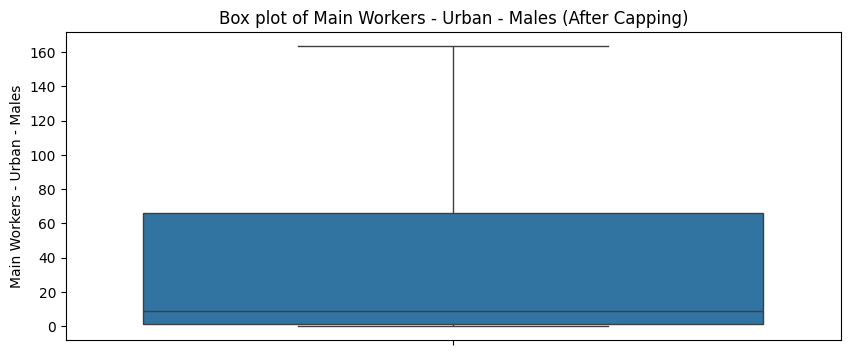

Processing column: Main Workers - Urban - Females


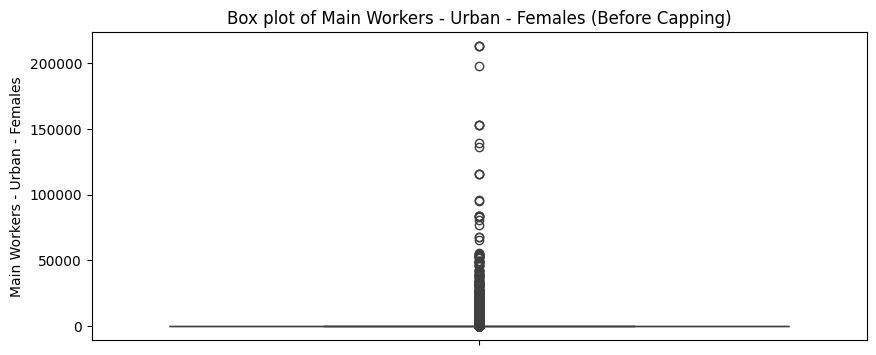

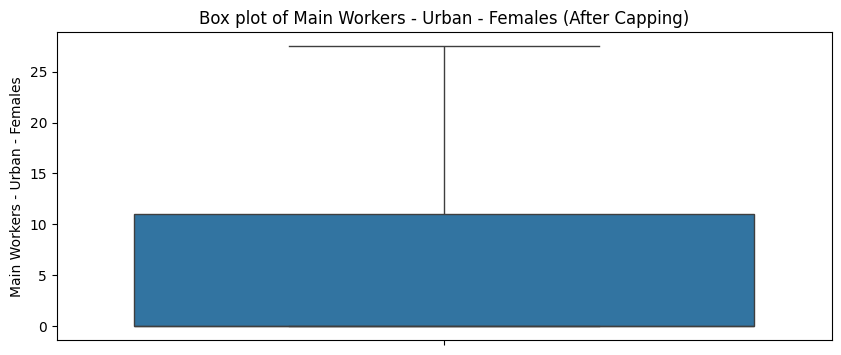

Processing column: Marginal Workers - Total -  Persons


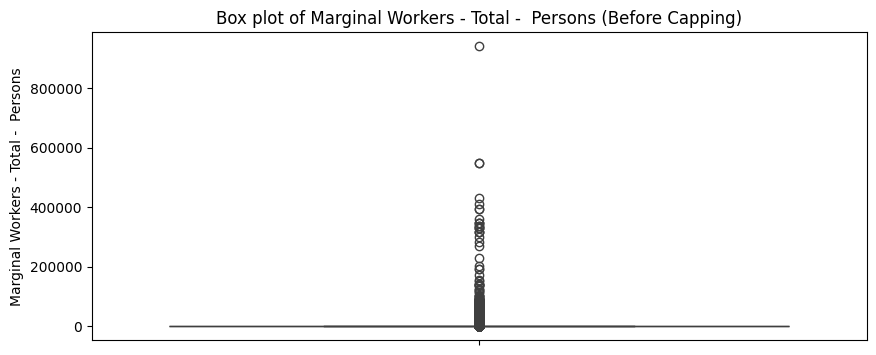

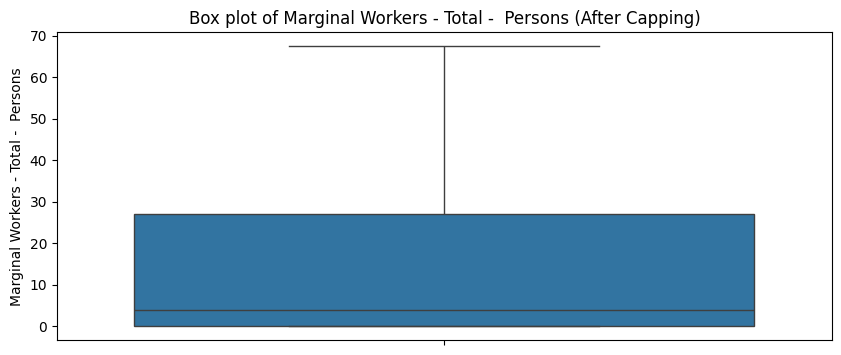

Processing column: Marginal Workers - Total - Males


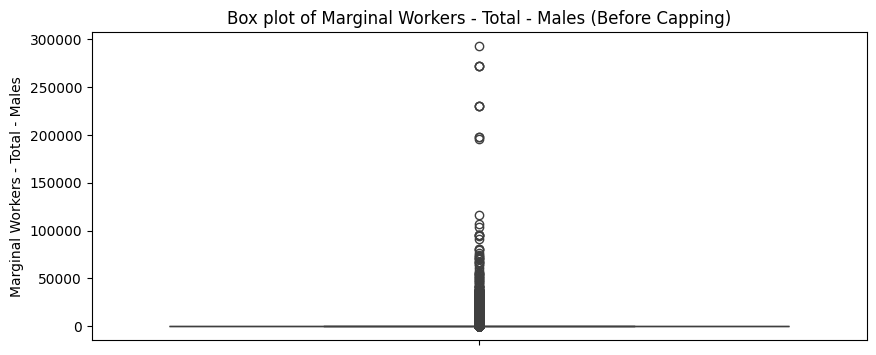

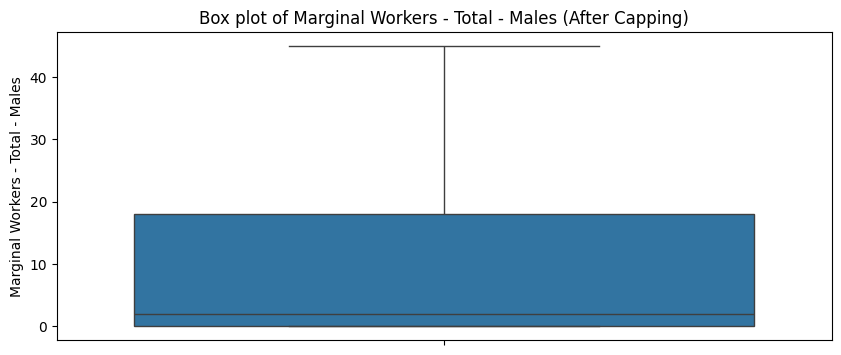

Processing column: Marginal Workers - Total - Females


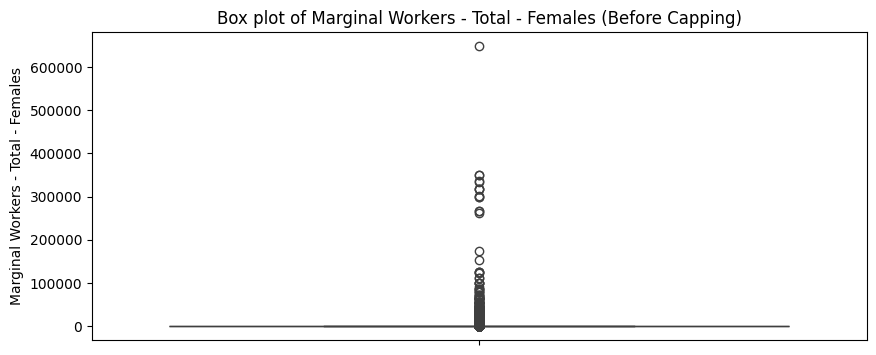

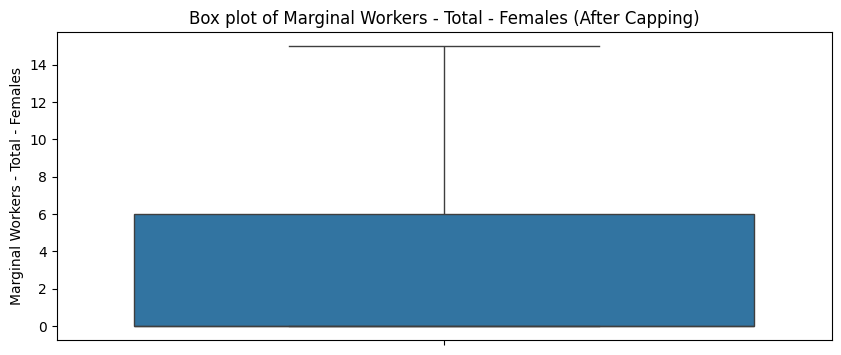

Processing column: Marginal Workers - Rural -  Persons


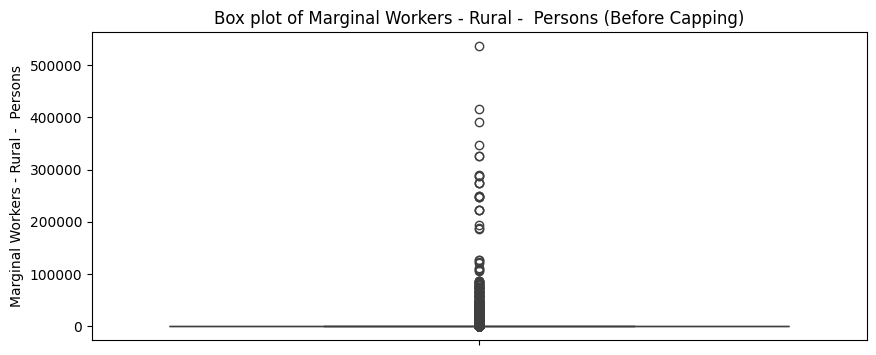

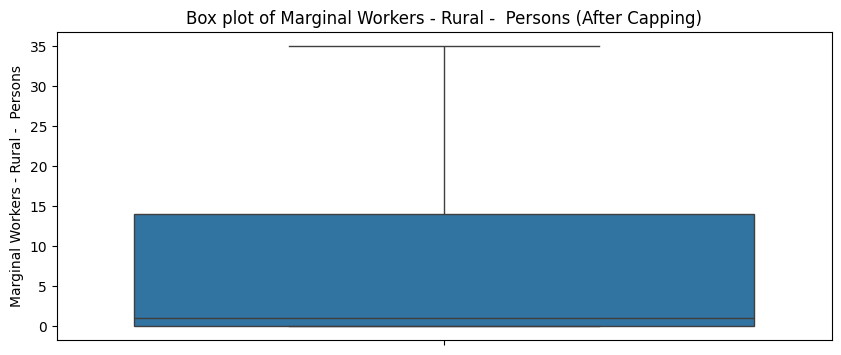

Processing column: Marginal Workers - Rural - Males


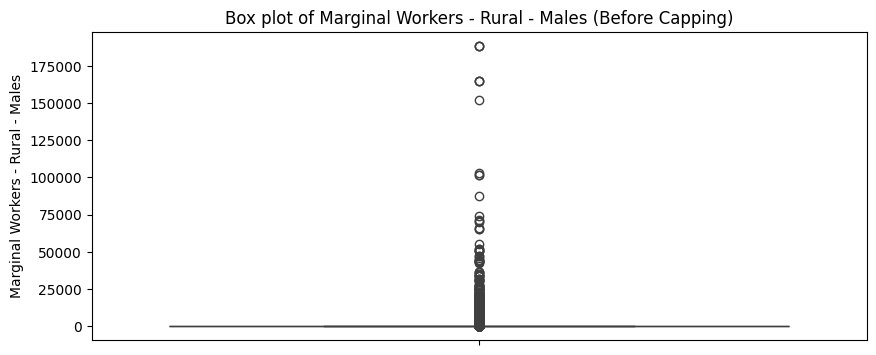

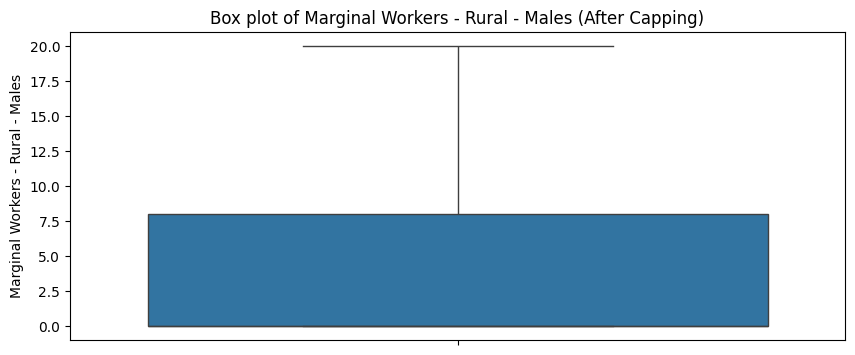

Processing column: Marginal Workers - Rural - Females


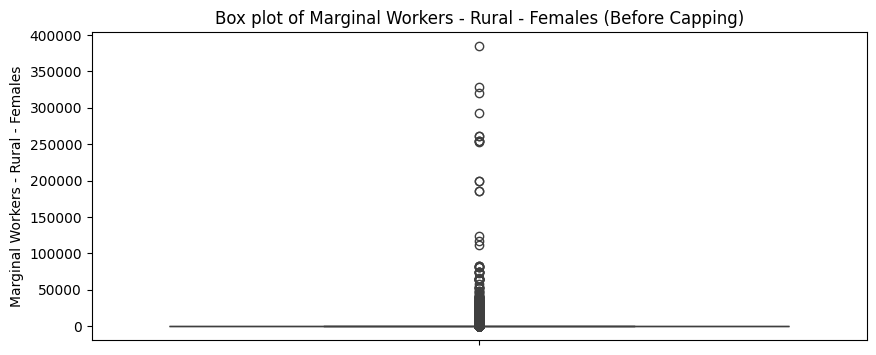

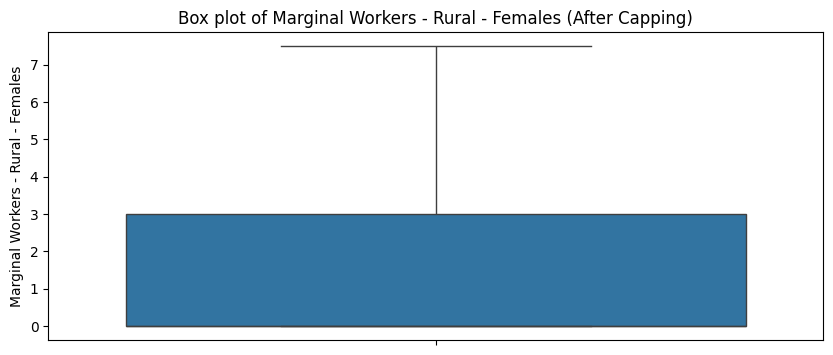

Processing column: Marginal Workers - Urban -  Persons


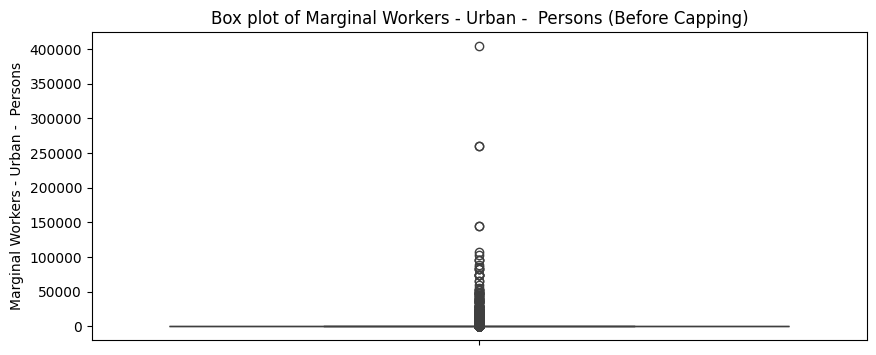

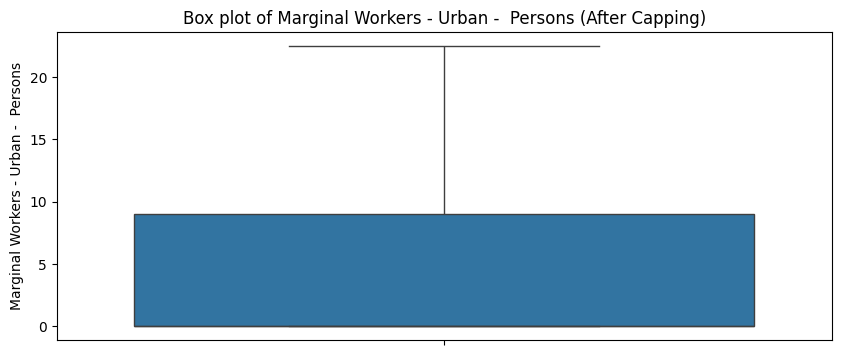

Processing column: Marginal Workers - Urban - Males


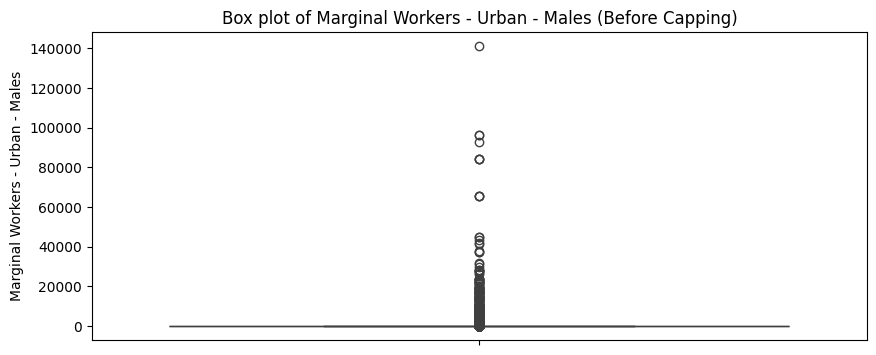

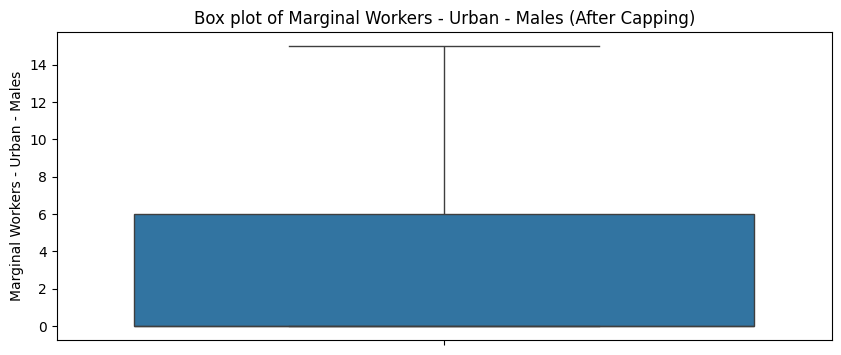

Processing column: Marginal Workers - Urban - Females


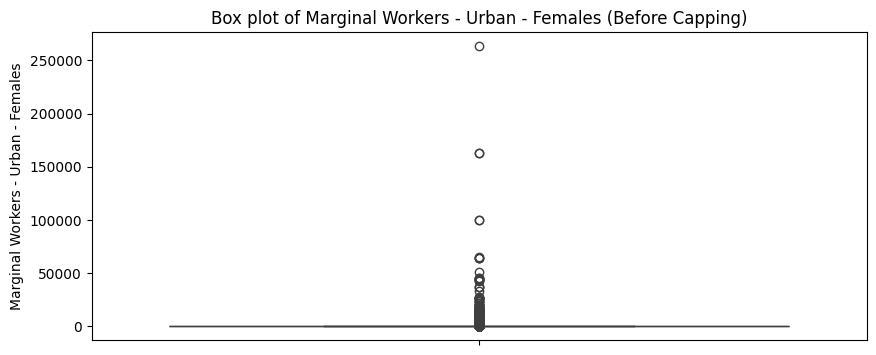

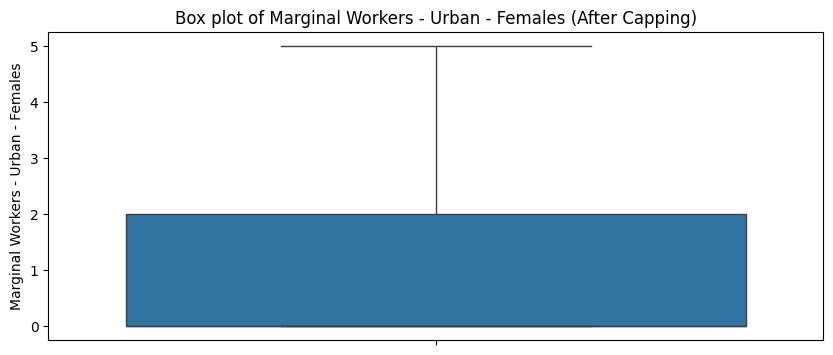

Outlier handling complete.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_cols = df_filtered.select_dtypes(include=np.number).columns.tolist()

# Function to detect and cap outliers using IQR
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df

# Visualize and cap outliers for each numeric column
for col in numeric_cols:
    print(f"Processing column: {col}")

    # Visualize before capping (using box plot)
    plt.figure(figsize=(10, 4))
    sns.boxplot(y=df_filtered[col])
    plt.title(f'Box plot of {col} (Before Capping)')
    plt.show()

    # Cap outliers
    df_filtered = cap_outliers_iqr(df_filtered.copy(), col)

    # Visualize after capping (using box plot)
    plt.figure(figsize=(10, 4))
    sns.boxplot(y=df_filtered[col])
    plt.title(f'Box plot of {col} (After Capping)')
    plt.show()

print("Outlier handling complete.")


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194651 entries, 1 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   State Code                           194651 non-null  object 
 1   District Code                        194651 non-null  object 
 2   India/States                         194651 non-null  object 
 3   Division                             194651 non-null  object 
 4   Group                                194651 non-null  object 
 5   Class                                194651 non-null  object 
 6   NIC Name                             194651 non-null  object 
 7   Main Workers - Total -  Persons      194651 non-null  float64
 8   Main Workers - Total - Males         194651 non-null  float64
 9   Main Workers - Total - Females       194651 non-null  float64
 10  Main Workers - Rural -  Persons      194651 non-null  float64
 11  Main Workers - Rur

In [ ]:
df_filtered

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"Crop and animal production, hunting and relate...",456.0,348.5,60.0,...,27.5,67.5,45.0,15.0,35.0,20.0,7.5,22.5,15.0,5.0
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,Growing of non-perennial crops,81.0,70.0,11.0,...,9.0,9.0,5.0,4.0,5.0,3.0,2.0,4.0,2.0,2.0
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",46.0,42.0,4.0,...,4.0,4.0,2.0,2.0,0.0,0.0,0.0,4.0,2.0,2.0
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"Growing of vegetables and melons, roots and tu...",21.0,16.0,5.0,...,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,Growing of sugar cane,0.0,0.0,0.0,...,0.0,4.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`33,`633,District - Tiruppur,`99,`000,`0000,Activities of extraterritorial organizations a...,456.0,348.5,60.0,...,27.5,67.5,45.0,15.0,35.0,20.0,7.5,22.5,15.0,5.0
195141,`33,`633,District - Tiruppur,`99,`991,`0000,Blank,456.0,348.5,60.0,...,27.5,67.5,45.0,15.0,35.0,20.0,7.5,22.5,15.0,5.0
195142,`33,`633,District - Tiruppur,`99,`991,`9910,Blank,456.0,348.5,60.0,...,27.5,67.5,45.0,15.0,35.0,20.0,7.5,22.5,15.0,5.0
195143,`33,`633,District - Tiruppur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,456.0,171.0,60.0,...,27.5,67.5,45.0,15.0,35.0,20.0,7.5,22.5,15.0,5.0


In [ ]:

# convert numeric columns to integer
for col in numeric_cols:
  try:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')
    df_filtered[col] = df_filtered[col].fillna(0)
    df_filtered[col] = df_filtered[col].astype(int)
  except ValueError as e:
    print(f"Could not convert column {col} to integer. Error: {e}")
  except TypeError as e:
    print(f"Could not convert column {col} to integer due to type issue. Error: {e}")

print("Numeric column data type conversion complete.")

df_filtered.info()



Numeric column data type conversion complete.
<class 'pandas.core.frame.DataFrame'>
Index: 194651 entries, 1 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           194651 non-null  object
 1   District Code                        194651 non-null  object
 2   India/States                         194651 non-null  object
 3   Division                             194651 non-null  object
 4   Group                                194651 non-null  object
 5   Class                                194651 non-null  object
 6   NIC Name                             194651 non-null  object
 7   Main Workers - Total -  Persons      194651 non-null  int64 
 8   Main Workers - Total - Males         194651 non-null  int64 
 9   Main Workers - Total - Females       194651 non-null  int64 
 10  Main Workers - Rural -  Persons      194651 non-nul

In [ ]:
df_filtered.isnull().sum()

,0
State Code,0
District Code,0
India/States,0
Division,0
Group,0
Class,0
NIC Name,0
Main Workers - Total - Persons,0
Main Workers - Total - Males,0
Main Workers - Total - Females,0


In [ ]:
#NLP

df_filtered['NIC Name']=df_filtered['NIC Name'].str.lower()
df_filtered.head()


,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"crop and animal production, hunting and relate...",456,348,60,...,27,67,45,15,35,20,7,22,15,5
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,growing of non-perennial crops,81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"growing of cereals (except rice), leguminous c...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"growing of vegetables and melons, roots and tu...",21,16,5,...,3,1,1,0,1,1,0,0,0,0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,growing of sugar cane,0,0,0,...,0,4,2,2,4,2,2,0,0,0


In [ ]:
def remove_whitespace(text):
    return  " ".join(text.split())


In [ ]:
df_filtered['NIC Name']=df_filtered['NIC Name'].apply(remove_whitespace)

In [ ]:

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')


df_filtered['NIC Name'] = df_filtered['NIC Name'].apply(nltk.word_tokenize)

df_filtered.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"[crop, and, animal, production, ,, hunting, an...",456,348,60,...,27,67,45,15,35,20,7,22,15,5
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,"[growing, of, non-perennial, crops]",81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"[growing, of, cereals, (, except, rice, ), ,, ...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"[growing, of, vegetables, and, melons, ,, root...",21,16,5,...,3,1,1,0,1,1,0,0,0,0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,"[growing, of, sugar, cane]",0,0,0,...,0,4,2,2,4,2,2,0,0,0


In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('punkt_tab')

df_filtered['NIC Name'] = df_filtered['NIC Name'].apply(nltk.word_tokenize)

df_filtered.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


TypeError: expected string or bytes-like object, got 'list'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)

    return result

In [ ]:
df_filtered['NIC Name'] = df_filtered['NIC Name'].apply(remove_stopwords)
df_filtered.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"[crop, animal, production, ,, hunting, related...",456,348,60,...,27,67,45,15,35,20,7,22,15,5
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,"[growing, non-perennial, crops]",81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"[growing, cereals, (, except, rice, ), ,, legu...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"[growing, vegetables, melons, ,, roots, tubers]",21,16,5,...,3,1,1,0,1,1,0,0,0,0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,"[growing, sugar, cane]",0,0,0,...,0,4,2,2,4,2,2,0,0,0


In [ ]:
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):

    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

df_filtered['NIC Name'] = df_filtered['NIC Name'].apply(remove_punct)
df_filtered.head()


,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"[crop, animal, production, hunting, related, s...",456,348,60,...,27,67,45,15,35,20,7,22,15,5
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,"[growing, non, perennial, crops]",81,70,11,...,9,9,5,4,5,3,2,4,2,2
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"[growing, cereals, except, rice, leguminous, c...",46,42,4,...,4,4,2,2,0,0,0,4,2,2
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"[growing, vegetables, melons, roots, tubers]",21,16,5,...,3,1,1,0,1,1,0,0,0,0
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,"[growing, sugar, cane]",0,0,0,...,0,4,2,2,4,2,2,0,0,0


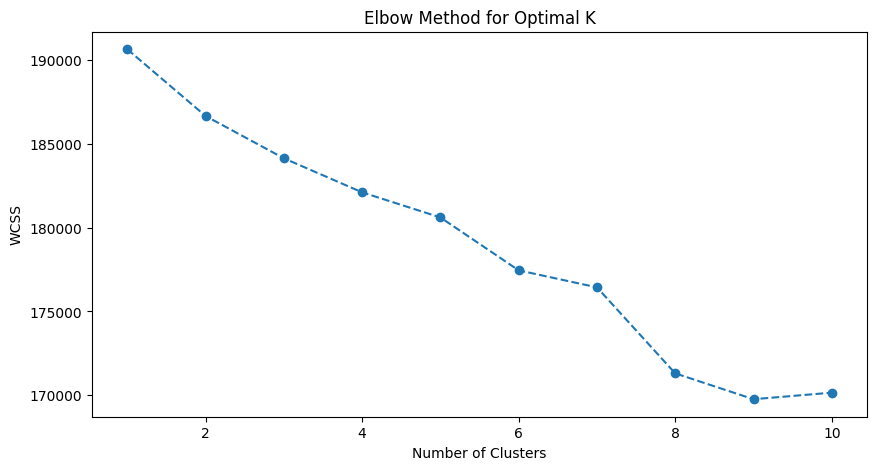

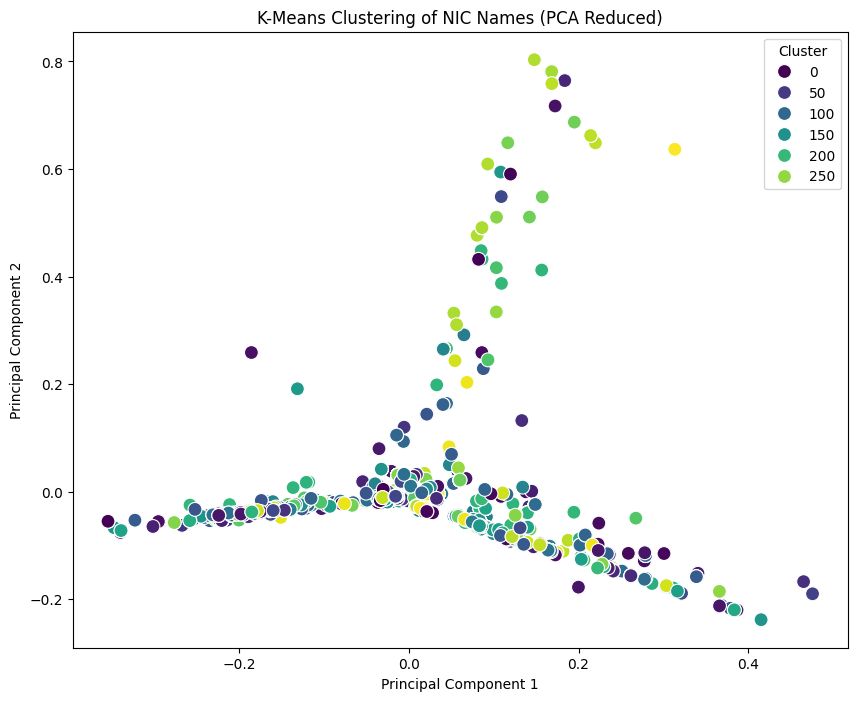

Distribution of NIC Names per Cluster:
Cluster
125    2510
23     1788
18     1645
0      1539
49     1525
       ... 
289     185
299     150
290     135
266     129
294     127
Name: count, Length: 300, dtype: int64

Sample NIC Names per Cluster:

Cluster 0:
['education', 'education n e c', 'education', 'cultural education', 'education n e c']

Cluster 1:
['personal service activities', 'personal service activities n e c', 'personal service activities n e c', 'personal service activities', 'personal service activities']

Cluster 2:
['retail sale stores stalls markets', 'retail trade stores stalls markets', 'retail trade stores stalls markets', 'retail sale stores stalls markets', 'retail trade stores stalls markets']

Cluster 3:
['manufacture medical dental instruments supplies', 'manufacture medical dental instruments supplies', 'manufacture medical dental instruments supplies', 'manufacture medical dental instruments supplies', 'manufacture medical dental instruments supplies']

Cl

In [ ]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

# Join the processed tokens back into strings for TF-IDF
df_filtered['NIC Name Processed'] = df_filtered['NIC Name'].apply(lambda x: ' '.join(x))

# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000) # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['NIC Name Processed'])

# Determine the optimal number of clusters using the elbow method (optional but recommended)
WCSS = []
for i in range(1, 11): # Try a range of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), WCSS, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


n_clusters = 300

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(tfidf_matrix)

# Add the cluster labels to the dataframe
df_filtered['Cluster'] = kmeans.labels_


# Since TF-IDF matrices are high-dimensional, we'll use PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(tfidf_matrix.toarray()) 

df_pca = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
df_pca['Cluster'] = df_filtered['Cluster'].reset_index(drop=True) 

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('K-Means Clustering of NIC Names (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the distribution of data points within each cluster
print("Distribution of NIC Names per Cluster:")
print(df_filtered['Cluster'].value_counts())

# Display some sample NIC Names from each cluster
print("\nSample NIC Names per Cluster:")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(df_filtered[df_filtered['Cluster'] == i]['NIC Name Processed'].sample(min(5, len(df_filtered[df_filtered['Cluster'] == i]))).tolist())


silhouette_avg = silhouette_score(tfidf_matrix, df_filtered['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg}")

print("\nTop terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(n_clusters):
    print(f"Cluster {i}:", end='')
    for ind in order_centroids[i, :10]: 
        print(f' {terms[ind]}', end='')
    print()


In [ ]:
df_filtered

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Processed,Cluster
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"[crop, animal, production, hunting, related, s...",456,348,60,...,45,15,35,20,7,22,15,5,crop animal production hunting related service...,222
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,"[growing, non, perennial, crops]",81,70,11,...,5,4,5,3,2,4,2,2,growing non perennial crops,49
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"[growing, cereals, except, rice, leguminous, c...",46,42,4,...,2,2,0,0,0,4,2,2,growing cereals except rice leguminous crops o...,229
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"[growing, vegetables, melons, roots, tubers]",21,16,5,...,1,0,1,1,0,0,0,0,growing vegetables melons roots tubers,204
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,"[growing, sugar, cane]",0,0,0,...,2,2,4,2,2,0,0,0,growing sugar cane,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`33,`633,District - Tiruppur,`99,`000,`0000,"[activities, extraterritorial, organizations, ...",456,348,60,...,45,15,35,20,7,22,15,5,activities extraterritorial organizations bodies,65
195141,`33,`633,District - Tiruppur,`99,`991,`0000,[blank],456,348,60,...,45,15,35,20,7,22,15,5,blank,108
195142,`33,`633,District - Tiruppur,`99,`991,`9910,[blank],456,348,60,...,45,15,35,20,7,22,15,5,blank,108
195143,`33,`633,District - Tiruppur,`99,`992,`0000,"[incomplete, description, wrongly, classifed]",456,171,60,...,45,15,35,20,7,22,15,5,incomplete description wrongly classifed,62


In [ ]:


output_filename_clustered = "/content/clustered_nic_data2.csv"

df_filtered.to_csv(output_filename_clustered, index=False)

DataFrame with clustering results saved to /content/clustered_nic_data2.csv


In [ ]:
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 194651 entries, 1 to 195144
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           194651 non-null  object
 1   District Code                        194651 non-null  object
 2   India/States                         194651 non-null  object
 3   Division                             194651 non-null  object
 4   Group                                194651 non-null  object
 5   Class                                194651 non-null  object
 6   NIC Name                             194651 non-null  object
 7   Main Workers - Total -  Persons      194651 non-null  int64 
 8   Main Workers - Total - Males         194651 non-null  int64 
 9   Main Workers - Total - Females       194651 non-null  int64 
 10  Main Workers - Rural -  Persons      194651 non-null  int64 
 11  Main Workers - Rural - Males   

In [ ]:
df_filtered['total_workers'] = df_filtered['Main Workers - Total -  Persons'] + df_filtered['Marginal Workers - Total -  Persons']
df_filtered['main_workers_male_female_ratio'] = df_filtered['Main Workers - Total - Males'] / (df_filtered['Main Workers - Total - Females'])
df_filtered['marginal_workers_male_female_ratio'] = df_filtered['Marginal Workers - Total - Males'] / (df_filtered['Marginal Workers - Total - Females'])

In [ ]:
df_filtered

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Processed,Cluster,total_workers,main_workers_male_female_ratio,marginal_workers_male_female_ratio
1,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"[crop, animal, production, hunting, related, s...",456,348,60,...,20,7,22,15,5,crop animal production hunting related service...,222,523,5.800000,3.00
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,"[growing, non, perennial, crops]",81,70,11,...,3,2,4,2,2,growing non perennial crops,49,90,6.363636,1.25
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"[growing, cereals, except, rice, leguminous, c...",46,42,4,...,0,0,4,2,2,growing cereals except rice leguminous crops o...,229,50,10.500000,1.00
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"[growing, vegetables, melons, roots, tubers]",21,16,5,...,1,0,0,0,0,growing vegetables melons roots tubers,204,22,3.200000,inf
5,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,"[growing, sugar, cane]",0,0,0,...,2,2,0,0,0,growing sugar cane,286,4,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`33,`633,District - Tiruppur,`99,`000,`0000,"[activities, extraterritorial, organizations, ...",456,348,60,...,20,7,22,15,5,activities extraterritorial organizations bodies,65,523,5.800000,3.00
195141,`33,`633,District - Tiruppur,`99,`991,`0000,[blank],456,348,60,...,20,7,22,15,5,blank,108,523,5.800000,3.00
195142,`33,`633,District - Tiruppur,`99,`991,`9910,[blank],456,348,60,...,20,7,22,15,5,blank,108,523,5.800000,3.00
195143,`33,`633,District - Tiruppur,`99,`992,`0000,"[incomplete, description, wrongly, classifed]",456,171,60,...,20,7,22,15,5,incomplete description wrongly classifed,62,523,2.850000,3.00


In [49]:
import pandas as pd
df_filtered=pd.read_csv("/content/clustered_nic_data2.csv")

In [50]:
df_filtered

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Processed,Cluster,total_workers,main_workers_male_female_ratio,marginal_workers_male_female_ratio
0,`27,`000,STATE - MAHARASHTRA,`01,`000,`0000,"['crop', 'animal', 'production', 'hunting', 'r...",456,348,60,...,20,7,22,15,5,crop animal production hunting related service...,222,523,5.800000,3.00
1,`27,`000,STATE - MAHARASHTRA,`01,`011,`0000,"['growing', 'non', 'perennial', 'crops']",81,70,11,...,3,2,4,2,2,growing non perennial crops,49,90,6.363636,1.25
2,`27,`000,STATE - MAHARASHTRA,`01,`011,`0111,"['growing', 'cereals', 'except', 'rice', 'legu...",46,42,4,...,0,0,4,2,2,growing cereals except rice leguminous crops o...,229,50,10.500000,1.00
3,`27,`000,STATE - MAHARASHTRA,`01,`011,`0113,"['growing', 'vegetables', 'melons', 'roots', '...",21,16,5,...,1,0,0,0,0,growing vegetables melons roots tubers,204,22,3.200000,inf
4,`27,`000,STATE - MAHARASHTRA,`01,`011,`0114,"['growing', 'sugar', 'cane']",0,0,0,...,2,2,0,0,0,growing sugar cane,286,4,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194646,`33,`633,District - Tiruppur,`99,`000,`0000,"['activities', 'extraterritorial', 'organizati...",456,348,60,...,20,7,22,15,5,activities extraterritorial organizations bodies,65,523,5.800000,3.00
194647,`33,`633,District - Tiruppur,`99,`991,`0000,['blank'],456,348,60,...,20,7,22,15,5,blank,108,523,5.800000,3.00
194648,`33,`633,District - Tiruppur,`99,`991,`9910,['blank'],456,348,60,...,20,7,22,15,5,blank,108,523,5.800000,3.00
194649,`33,`633,District - Tiruppur,`99,`992,`0000,"['incomplete', 'description', 'wrongly', 'clas...",456,171,60,...,20,7,22,15,5,incomplete description wrongly classifed,62,523,2.850000,3.00


In [52]:
df_filtered[['State', 'District']] = df_filtered['India/States'].str.extract(r'STATE - (\w+)|District - (\w+)', expand=True)
df_filtered = df_filtered.drop('India/States', axis=1)

In [53]:
df_filtered[['State', 'District']].isnull().sum()

,0
State,179959
District,14692


In [55]:
df_filtered['State'] = df_filtered['State'].ffill()
df_filtered['District'] = df_filtered['District'].bfill()

In [56]:
df_filtered

,State Code,District Code,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,...,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Processed,Cluster,total_workers,main_workers_male_female_ratio,marginal_workers_male_female_ratio,State,District
0,`27,`000,`01,`000,`0000,"['crop', 'animal', 'production', 'hunting', 'r...",456,348,60,177,...,22,15,5,crop animal production hunting related service...,222,523,5.800000,3.00,MAHARASHTRA,Nandurbar
1,`27,`000,`01,`011,`0000,"['growing', 'non', 'perennial', 'crops']",81,70,11,36,...,4,2,2,growing non perennial crops,49,90,6.363636,1.25,MAHARASHTRA,Nandurbar
2,`27,`000,`01,`011,`0111,"['growing', 'cereals', 'except', 'rice', 'legu...",46,42,4,18,...,4,2,2,growing cereals except rice leguminous crops o...,229,50,10.500000,1.00,MAHARASHTRA,Nandurbar
3,`27,`000,`01,`011,`0113,"['growing', 'vegetables', 'melons', 'roots', '...",21,16,5,15,...,0,0,0,growing vegetables melons roots tubers,204,22,3.200000,inf,MAHARASHTRA,Nandurbar
4,`27,`000,`01,`011,`0114,"['growing', 'sugar', 'cane']",0,0,0,0,...,0,0,0,growing sugar cane,286,4,NaN,1.00,MAHARASHTRA,Nandurbar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194646,`33,`633,`99,`000,`0000,"['activities', 'extraterritorial', 'organizati...",456,348,60,177,...,22,15,5,activities extraterritorial organizations bodies,65,523,5.800000,3.00,TAMIL,Tiruppur
194647,`33,`633,`99,`991,`0000,['blank'],456,348,60,177,...,22,15,5,blank,108,523,5.800000,3.00,TAMIL,Tiruppur
194648,`33,`633,`99,`991,`9910,['blank'],456,348,60,177,...,22,15,5,blank,108,523,5.800000,3.00,TAMIL,Tiruppur
194649,`33,`633,`99,`992,`0000,"['incomplete', 'description', 'wrongly', 'clas...",456,171,60,177,...,22,15,5,incomplete description wrongly classifed,62,523,2.850000,3.00,TAMIL,Tiruppur


In [62]:
df_filtered.to_csv("/content/clustered_nic_data_with_state.csv")

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
df = pd.read_csv('clustered_nic_data_with_state.csv')

# Aggregate data by state
state_data = df.groupby('State').agg({
    'Main Workers - Total -  Persons': 'sum',
    'Marginal Workers - Total -  Persons': 'sum'
}).reset_index()

# Create a mapping between state names and GeoJSON state names
state_name_mapping = {
    'MAHARASHTRA' : 'Maharashtra',
    'GOA' : 'Goa',
    'BIHAR' : 'Bihar',
    'KERALA' : 'Kerala',
    'SIKKIM' : 'Sikkim',
    'JHARKHAND' : 'Jharkhand',
    'TRIPURA' : 'Tripura',
    'ODISHA' : 'Odisha',
    'UTTAR' : 'Uttar Pradesh',
    'HIMACHAL' : 'Himachal Pradesh',
    'MIZORAM' : 'Mizoram',
    'NCT' : 'Delhi',
    'MANIPUR' : 'Manipur',
    'GUJARAT' : 'Gujarat',
    'NAGALAND' : 'Nagaland',
    'RAJASTHAN' : 'Rajasthan',
    'UTTARAKHAND' : 'Uttarakhand',
    'ARUNACHAL' : 'Arunachal Pradesh',
    'WEST' : 'West Bengal',
    'KARNATAKA' : 'Karnataka',
    'PUDUCHERRY' : 'Puducherry',
    'ASSAM' : 'Assam',
    'TAMIL' : 'Tamil Nadu',

}

# Apply the mapping to your state names
state_data['State'] = state_data['State'].map(state_name_mapping)

# Calculate ratio for visualization
state_data['Worker Ratio'] = (state_data['Marginal Workers - Total -  Persons'] /
                             state_data['Main Workers - Total -  Persons'])

# Create base figure with main workers
fig = go.Figure()

# Add main workers layer (base color)
fig.add_trace(go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    locations=state_data['State'],
    featureidkey='properties.ST_NM',
    z=state_data['Main Workers - Total -  Persons'],
    colorscale='Blues',
    name='Main Workers',
    colorbar_title="Main Workers",
    marker_line_color='gray',
    marker_line_width=0.5,
    hoverinfo='location+z+name',
    hoverlabel={'namelength': -1}
))

# Add marginal workers layer (opacity represents ratio)
fig.add_trace(go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    locations=state_data['State'],
    featureidkey='properties.ST_NM',
    z=state_data['Worker Ratio'],
    colorscale='Reds',
    name='Marginal/Main Ratio',
    colorbar_title="Marginal Ratio",
    marker_opacity=0.7,
    marker_line_color='gray',
    marker_line_width=0.5,
    hoverinfo='location+z+name',
    hoverlabel={'namelength': -1},
    visible=True,
    showscale=True
))

# Customize hover template to show both values
fig.update_traces(
    hovertemplate=(
        "<b>%{location}</b><br>"
        "Main Workers: %{customdata[0]:,}<br>"
        "Marginal Workers: %{customdata[1]:,}<br>"
        "Ratio: %{customdata[2]:.2f}<extra></extra>"
    ),
    customdata=state_data[['Main Workers - Total -  Persons',
                          'Marginal Workers - Total -  Persons',
                          'Worker Ratio']]
)

# Update layout
fig.update_geos(
    fitbounds="locations",
    visible=False,
    projection_type="mercator",
    lonaxis_range=[68, 98],
    lataxis_range=[6, 38]
)

fig.update_layout(
    title_text='Main Workers (Blue) and Marginal-to-Main Ratio (Red)',
    title_x=0.5,
    margin={"r":0,"t":40,"l":0,"b":0},
    height=600,
    width=900,
    geo=dict(
        scope='asia',
    ),
    sliders=[{
        'active': 0,
        'steps': [
            {'method': 'update', 'label': 'Main Workers',
             'args': [{'visible': [True, False]}]},
            {'method': 'update', 'label': 'Marginal Ratio',
             'args': [{'visible': [False, True]}]},
            {'method': 'update', 'label': 'Both',
             'args': [{'visible': [True, True]}]}
        ]
    }]
)

fig.show()
fig.write_html("dual_layer_workers_map.html")